1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [8]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import poisson

x0=15
mu=6.3
sigma_mu = 3.
p_value = 1 - poisson.cdf(x0, mu)
print("The pvalue is:", p_value)
alpha=0.05
if(p_value<alpha):
    print("We reject the null hypothesis.")
else:
    print("We accept the null hypothesis.")

The pvalue is: 0.0008444930803583883
We reject the null hypothesis.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
# input data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
alpha=0.5

# calculate the variance and its sqrt()
var_pre = np.var(pre, ddof=1)
var_post = np.var(post, ddof=1)
sigma=np.sqrt((var_pre+var_post)/2)

#calculate the mean
mean_pre=np.mean(pre)
mean_post=np.mean(post)
l=len(pre)

# calculate the test statistics
t = (mean_pre - mean_post) / (sigma * np.sqrt(2/l))
print("T =", t)
pvalue = stats.t.cdf(t, l - 1) + (1. - stats.t.cdf(-t, l - 1)) #calculate the value
print("pvalue=",pvalue)
if(pvalue > alpha/2):
    print("Statistically significant")
else:
    print("Not statistically significant")

T = -3.786997938137629
pvalue= 0.004302464132864604
Not statistically significant


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [ ]:
#Plot these temperatures.
max_arr=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]) 
min_arr=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
l=len(max_arr)
x=np.arange(0,l)
plt.scatter(x,max_arr)
plt.scatter(x,min_arr)
plt.show()

#Find a suitable a function that can describe min and max temperatures
def f(x,a, x0, sigma,o):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + o
x2=np.arange(0,l)
par_max,_=scipy.optimize.curve_fit(f,x2,max_arr)
par_min,_=scipy.optimize.curve_fit(f,x2,min_arr,p0 = [50, 6, 1, -60],full_output=False)
print("The optimized parameters for max temperatures:", par_max)
print("The optimized parameters for min temperatures:", par_min)
x = np.linspace(0,12,100)
y_max = f(x,par_max[0],par_max[1],par_max[2],par_max[3])
y_min = f(x,par_min[0],par_min[1],par_min[2],par_min[3])
plt.plot(x,y_max)
plt.plot(x,y_min)
plt.scatter(x2,max_arr,c='g')
plt.scatter(x2,min_arr,c='m')

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

TypeError: f() takes 4 positional arguments but 5 were given

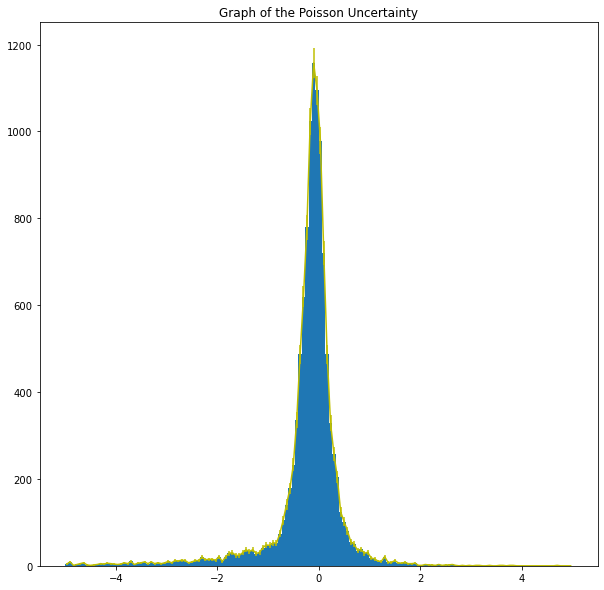

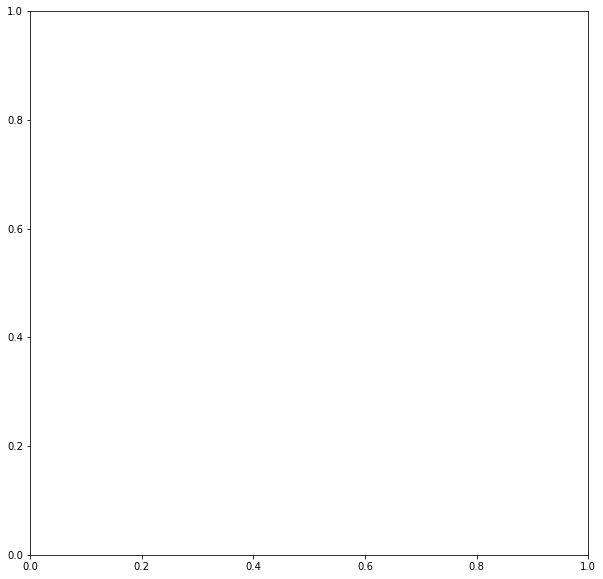

In [11]:
infile = open("residuals_261.pkl", "rb")
my_dict = pickle.load(infile)
infile.close()

dataset = pd.DataFrame(my_dict.tolist())
residuals=dataset["residuals"]
distances=dataset["distances"]
fig,ax1 = plt.subplots(figsize = (10,10))
fig,ax2 = plt.subplots(figsize = (10,10))
height,bins,_ = ax1.hist(residuals, bins = 150, range = (-5,5))
bin_centr = (bins[:-1] + bins[1:])/2
sig= np.sqrt(abs(height))
ax1.set_title("Graph of the Poisson Uncertainty")
ax1.errorbar(x = bin_centr, y = height, yerr = sig, color = "y")

#Plot of the fitting function
m, std_dev = stats.norm.fit(residuals)
par_opt,par_cov = scipy.optimize.curve_fit(f,bin_centr, height, p0 = [max(residuals),m,std,0])
ax2.set_title("Graph of the fitting function")
ax2.hist(residuals,bins = 150, range = (-5,5))
ax2.plot(bin_centr, f(bin_centr, *par_opt), color ="y")

#Perform a goodness-of-fit test
value = tuple(par_opt)
fit = f(bin_centr, *par_opt)
chi2 = np.sum(((height - fit)**2) / std**2)
print("chi2=",chi2)
pvalue = 1. - scipy.stats.chi2.cdf(chi2,len(bin_centr) - 1 )
print("pvalue=",pvalue)

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

--2023-01-20 23:16:11--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-20 23:16:11--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc150c18d9cf369d0168e8f61e1a.dl.dropboxusercontent.com/cd/0/inline/B09W37fj4AAtai92GrXZ2aZsRVoGXzAdvvRCH4z3OsJO-ByYl9zl5XbaUsoesEgMJCgau4OVF_i-xNblu39m9R_qZ3gk8vZoWTnmbPuPMD2b6B_QkMI8KdkhrnRbjIkq6KPnHV3JmW9Ghxadf52rUZz1PhixGPSef-23DrzxCgpBHA/file# [following]
--2023-01-20 23:16:12--  https://uc150c18d9cf369d0168e8f

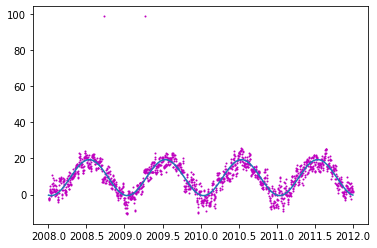

The best-fit parameters:  [-9.98813369 12.33302301  9.38411487]
The average temperature in Munich 9.384097734976043
The hottest typical day temperature predicted:  19.372248557225234
The coldest typical day temperature predicted:  -0.6040188210437964


In [5]:
#5- Temperatures in Munich

!wget --no-check-certificate https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
dataset = pd.read_csv("munich_temperatures_average_with_bad_data.txt",sep=' ',names=["Day","Temp"])
def f(t,a,b,c):
    return a*np.cos(2*pi*t + b) + c 


def g(t,a,b,c,d):
    return a*np.cos(2*pi*b*t + c) + d 

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    f = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    cl = 1. - scipy.stats.f.cdf(f, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % cl, ", Is additional parameter necessary? ->", "YES" if cl < 0.10 else "NO")
    return cl
dates_x=dataset[(dataset["Day"]>=2008)&(dataset["Day"]<=2012)]["Day"]
temp_y=dataset[(dataset["Day"]>=2008)&(dataset["Day"]<=2012)]["Temp"]
params,_ = scipy.optimize.curve_fit(f,dates_x,temp_y)
f_fit = f(dates_x,params[0],params[1],params[2])
plt.plot(dates_x,f_fit)
plt.scatter(dates_x,temp_y,s=1,c="m")
plt.show()
print("The best-fit parameters: ",params)
print("The average temperature in Munich",np.average(temp_y))
print("The hottest typical day temperature predicted: ",np.abs(params[0])+params[2])
print("The coldest typical day temperature predicted: ",params[0]+params[2])

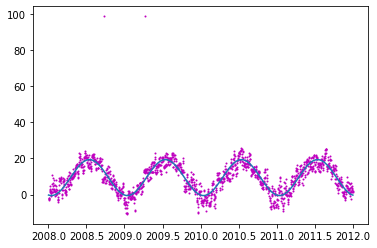

The best-fit parameters:  [-9.98218388  1.00144406 -5.90472718  9.39812492]
RSS 1:  34359.85859996652
RSS 2:  34352.794053704085


In [6]:


params,_ = scipy.optimize.curve_fit(g,dates_x,temp_y) ## same procedure as before

g_fit = g(dates_x,params[0],params[1],params[2],params[3])
plt.plot(dates_x,g_fit)
plt.scatter(dates_x,temp_y,s=1,c="m")
plt.show()

print("The best-fit parameters: ",params)



RSS_f=np.sum(np.square(temp_y - f_fit))
print("RSS 1: ",RSS_f)
RSS_g=np.sum(np.square(temp_y - g_fit))
print("RSS 2: ",RSS_g)



In [7]:


n1 = 2
n2 = 3
Ftest(RSS_f,RSS_g,n1,n2,len(temp_y),verbose=True)



CL: 0.584 , Is additional parameter necessary? -> NO


0.5840708127716518